In [65]:
import pandas as pd
import numpy as np

In [66]:
diabetes_data =  pd.read_csv("https://raw.githubusercontent.com/Swapnith07/ML-TASKS/main/ML-TASKS/diabetes.csv")
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [67]:
diabetes_data.shape

(768, 9)

In [68]:
diabetes_data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [69]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [70]:
# To check wether null values present or not
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [71]:
#It is to drop the null values row
diabetes_data.dropna(inplace=True)

In [72]:
#THere are no null values if we want to handle we use to find mean of it and replace the null value with mean
diabetes_data["Glucose"].fillna(diabetes_data["Glucose"].mean(), inplace=True)
diabetes_data["BloodPressure"].fillna(diabetes_data["BloodPressure"].mean(), inplace=True)
diabetes_data["SkinThickness"].fillna(diabetes_data["SkinThickness"].median(), inplace=True)
diabetes_data["Insulin"].fillna(diabetes_data["Insulin"].median(), inplace=True)
diabetes_data["BMI"].fillna(diabetes_data["BMI"].mean(), inplace=True)

In [73]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [74]:
X = diabetes_data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [75]:
Y =diabetes_data[['Outcome']]
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [76]:
diabetes_data.Age.describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [77]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [78]:
mean_glucose_diabetic = diabetes_data[diabetes_data["Outcome"] == 1]["Glucose"].mean()
mean_glucose_non_diabetic = diabetes_data[diabetes_data["Outcome"] == 0]["Glucose"].mean()

print("Mean Glucose Level for Diabetic Patients:", mean_glucose_diabetic)
print("Mean Glucose Level for Non-Diabetic Patients:", mean_glucose_non_diabetic)

Mean Glucose Level for Diabetic Patients: 141.25746268656715
Mean Glucose Level for Non-Diabetic Patients: 109.98


In [79]:
average_age_diabetic = diabetes_data[diabetes_data["Outcome"] == 1]["Age"].mean()
average_age_non_diabetic = diabetes_data[diabetes_data["Outcome"] == 0]["Age"].mean()

print("Average Age of Diabetic Patients:", average_age_diabetic)
print("Average Age of Non-Diabetic Patients:", average_age_non_diabetic)

Average Age of Diabetic Patients: 37.06716417910448
Average Age of Non-Diabetic Patients: 31.19


In [80]:
percentage_diabetic = (diabetes_data["Outcome"].sum() / diabetes_data["Outcome"].count()) * 100
print("\nPercentage of Diabetic Patients in the Dataset:", percentage_diabetic, "%")


Percentage of Diabetic Patients in the Dataset: 34.89583333333333 %


In [81]:
import matplotlib.pyplot as plt

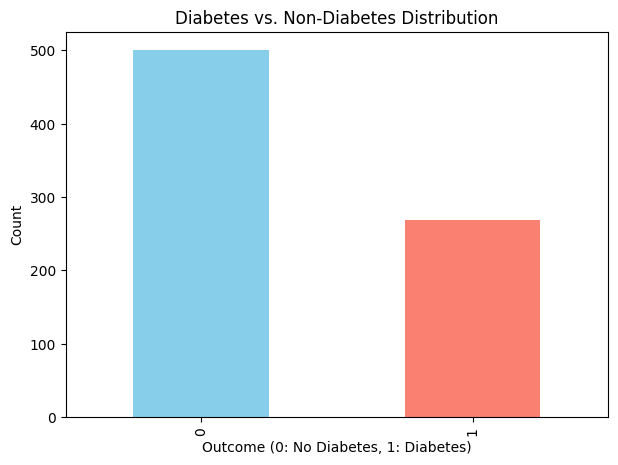

In [82]:
plt.figure(figsize=(7, 5))
diabetes_data['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.title('Diabetes vs. Non-Diabetes Distribution')
plt.show()

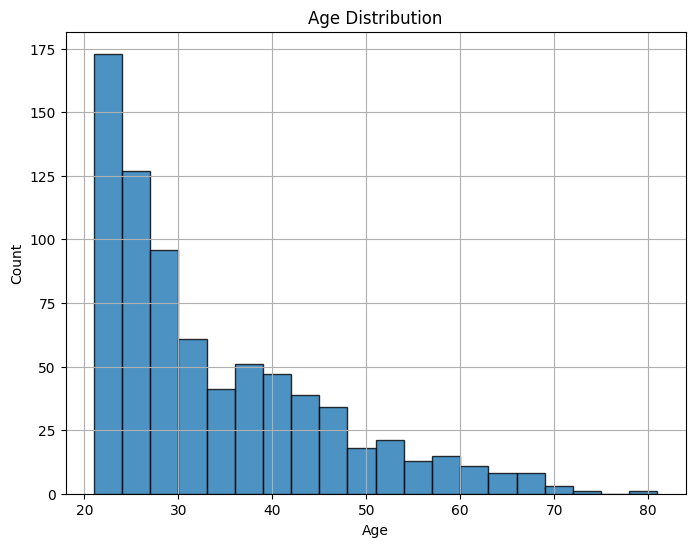

In [83]:
plt.figure(figsize=(8, 6))
diabetes_data['Age'].hist(edgecolor='black', bins=20, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

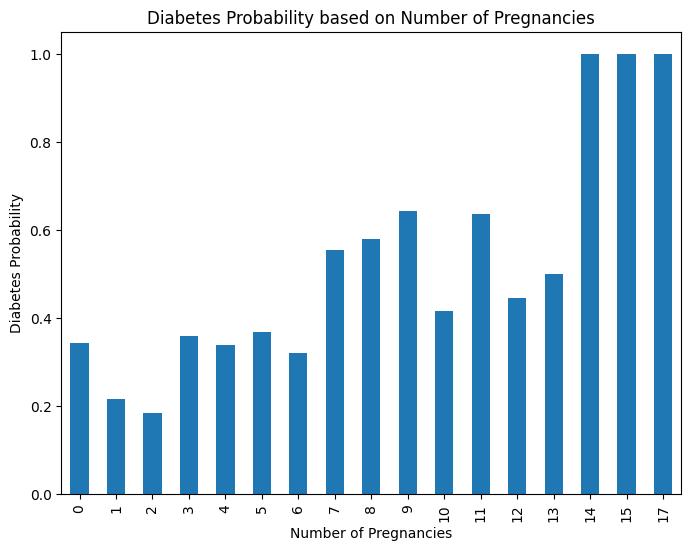

In [84]:
plt.figure(figsize=(8, 6))
diabetes_data.groupby('Pregnancies')['Outcome'].mean().plot(kind='bar')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Diabetes Probability')
plt.title('Diabetes Probability based on Number of Pregnancies')
plt.show()
